## Topic Modelling

In [3]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF


In [5]:
#loading preprocessed data
data = pd.read_csv(r"C:/Users/91894/OneDrive/Desktop/fake review/TP_DS.csv")

In [7]:
#The reviews variable will contain only the non-null review text
# Sample DataFrame (adjust the 'cleaned_text' column as needed)
reviews = data['cleaned_text'].dropna()  # Assuming 'data' is the DataFrame with review text

###  Step 1: Text Vectorization with TF-IDF

In [10]:
#transforme your text data (reviews) into a numerical format (tfidf_matrix) suitable for further analysis or modeling.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)


### Step 2: LDA and NMF for Topic Modeling

In [13]:
#apply two different algorithms (LDA and NMF) to identify topics in your text data
n_topics = 100 # Number of topics

# LDA Model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

# NMF Model
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Helper function to get top words per topic
def get_top_words(model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

# Get top words for each topic
lda_top_words = get_top_words(lda_model, tfidf_vectorizer.get_feature_names_out())
nmf_top_words = get_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out())

print("LDA Topics:\n", lda_top_words)
print("NMF Topics:\n", nmf_top_words)

LDA Topics:
 {'Topic 1': ['link', 'hook', 'usb', 'cook', 'port', 'slide', 'data', 'norm', 'ref', 'nbsp'], 'Topic 2': ['wrong', 'smaller', 'wheel', 'impress', 'usa', 'expect', 'memori', 'ca', 'comment', 'littl'], 'Topic 3': ['foot', 'bottl', 'shoe', 'fit', 'wide', 'comfort', 'narrow', 'size', 'wear', 'tight'], 'Topic 4': ['power', 'switch', 'garag', 'improv', 'display', 'control', 'work', 'use', 'instal', 'great'], 'Topic 5': ['pocket', 'hole', 'open', 'carri', 'bag', 'certainli', 'success', 'use', 'knife', 'close'], 'Topic 6': ['advertis', 'gun', 'stand', 'practic', 'suspens', 'shop', 'work', 'secur', 'great', 'use'], 'Topic 7': ['pan', 'air', 'dri', 'leak', 'fish', 'water', 'wash', 'stick', 'use', 'oper'], 'Topic 8': ['book', 'word', 'chain', 'inform', 'understand', 'read', 'matter', 'knew', 'subject', 'american'], 'Topic 9': ['case', 'bathroom', 'protect', 'pad', 'offic', 'tablet', 'ipad', 'plastic', 'great', 'fit'], 'Topic 10': ['trs', 'clip', 'jack', 'lower', 'headphon', 'possibl',

In [15]:
import pickle

# Save models and vectorizer
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
with open('nmf_model.pkl', 'wb') as f:
    pickle.dump(nmf_model, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

### Topic Modeling, Clustering (K-Means), and Visualization (PCA & t-SNE)

In [18]:
#performing topic modeling, followed by clustering (via K-Means) and visualizing the results using PCA and t-SNE.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
# Load Data
data = pd.read_csv(r"C:/Users/91894/OneDrive/Desktop/fake review/TP_DS.csv")
reviews = data['cleaned_text'].dropna()

#### #Step 1: Text Vectorization with TF-IDF

In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

#### # Step 2: LDA and NMF for Topic Modeling

In [26]:

from sklearn.decomposition import LatentDirichletAllocation, NMF
n_topics = 100

In [28]:
# LDA Model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)


#### #step 3: Apply K-Means Clustering on Topic Model Features

In [30]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(lda_topics)  # Using LDA topic distribution for clustering

#### # Step 4: Visualize Clusters using PCA or t-SNE

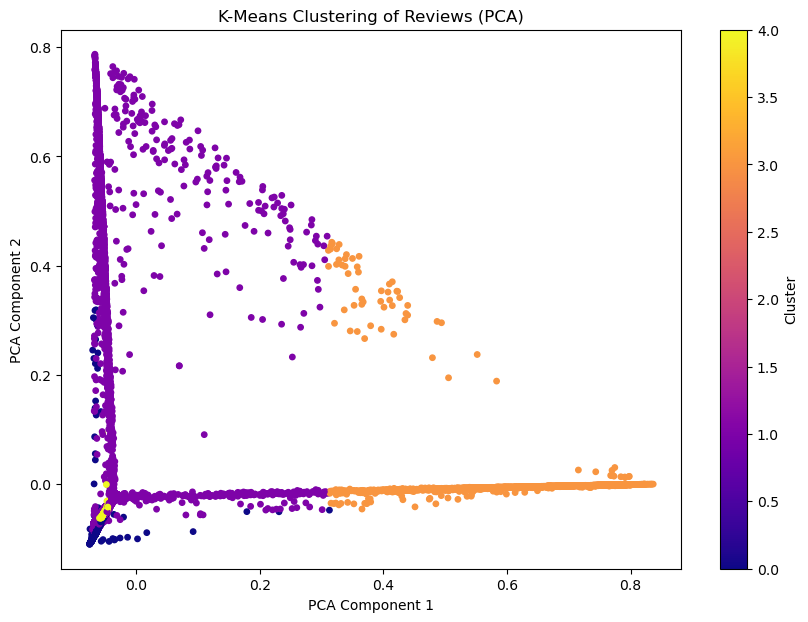

In [32]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(lda_topics)

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='plasma', s=15)
plt.title("K-Means Clustering of Reviews (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

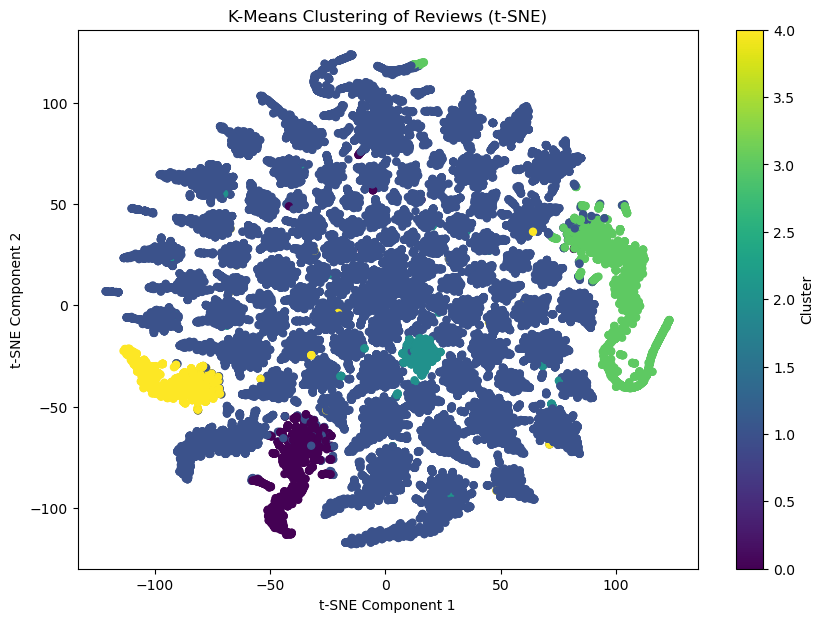

In [36]:
# Using t-SNE for dimensionality reduction (optional)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(lda_topics)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=kmeans_labels, cmap='viridis', s=25)
plt.title("K-Means Clustering of Reviews (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()